In [ ]:
!pip install attention
!pip install konlpy
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 27.0 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from konlpy.tag import Okt
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from attention import Attention

file_path = '/content/drive/MyDrive/test/테스트3.csv'
docs = []
okt = Okt()
tokenizer = Tokenizer()
SEED = 1

def seed_everything(seed: int = 42):  #시드에 따라 변할 수도 있으므로 고정
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

######################################################################## 전처리 시작

data = pd.read_csv(file_path) #판다스를 이용해서 csv파일에서 읽어옴
display(data['value'].value_counts())

data['value'] = data['value'].replace(['택배','공공', '스팸'],[0,1,2])
#택배, 공공, 스팸이라고 되어 있는 것을 각각 0,1,2로 바꿔줌


for sentence in data['text']:
  #text열에 있는 데이터들을 하나 씩 가져옴
    new_sentence = str(sentence).replace("\n", '')#.replace(" ", "")
    #한 칸씩 띄어쓰기 된 문장들을 replace로 한 줄로 만들어줌
    new_sentence = re.sub(r'[^\w\s]', '', new_sentence)
    #문장 안에 있는 모든 특수문자들을 없애줌
    docs.append(okt.nouns(new_sentence))
    # 한국어 처리 패키지인 konlpy를 이용하여 문장 안에 있는 명사들을 추출함

tokenizer.fit_on_texts(docs)
# 케라스의 Tokenizer를 이용하여 입력된 텍스트를 바탕으로 단어를 추출,
# 정수 인덱스를 부여하여 Tokenizer 내부에 딕셔너리 형태의 단어 목록을 생성한다.
print(tokenizer.word_index)
docs = tokenizer.texts_to_sequences(docs)
# 입력된 문장을 각 단어의 인덱스로 이루어진 순서형 데이터로 변환.

max_len = max(len(item) for item in docs)
voca_size = len(tokenizer.word_index) + 1

X_data = pad_sequences(docs, maxlen=max_len)  #패딩
print(X_data)
y_data=data['value']
y_data = to_categorical(y_data) #원 핫 인코딩

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) #데이터들을 8:2로 train과 test로 분리
print(X_test)
print(voca_size)
# print(y_test)

스팸    565
공공     55
택배     45
Name: value, dtype: int64

{'발신': 1, '국외': 2, '무료': 3, '거부': 4, '광고': 5, '배송': 6, '쿨': 7, '확인': 8, '고객': 9, '신청': 10, '행사': 11, '상품': 12, '시': 13, '및': 14, '이용': 15, '쿠폰': 16, '안내': 17, '신규': 18, '번호': 19, '완료': 20, '지급': 21, '센터': 22, '이벤트': 23, '수': 24, '주말': 25, '발급': 26, '후': 27, '뇨': 28, '등': 29, '지원': 30, '경우': 31, '해': 32, '시험': 33, '변경': 34, '등록': 35, '노': 36, '정보': 37, '통운': 38, '사항': 39, '아트': 40, '오늘': 41, '장소': 42, '혜택': 43, '가능': 44, '예정': 45, '추가': 46, '홈페이지': 47, '카카오': 48, '문의': 49, '꿀': 50, '회원': 51, '역': 52, '금일': 53, '수신': 54, '가입': 55, '클릭': 56, '입영': 57, '택배': 58, '하루': 59, '금융': 60, '텔레': 61, '사랑': 62, '코어': 63, '시간': 64, '위탁': 65, '코로나': 66, '선물': 67, '도착': 68, '빅토리': 69, '맛집': 70, '위': 71, '앞': 72, '학생': 73, '입금': 74, '주소': 75, '실시간': 76, '최고': 77, '비': 78, '진행': 79, '관리': 80, '서비스': 81, '대박': 82, '코드': 83, '톡': 84, '응시': 85, '일': 86, '생활관': 87, '반드시': 88, '한진택배': 89, '본인': 90, '동의': 91, '접속': 92, '업계': 93, '학자금': 94, '금': 95, '접종': 96, '시기': 97, '문자': 98, '기간': 99, '관련': 100, '한국': 101, 

In [ ]:
model_path = '/content/drive/MyDrive/test/model' + 'voca_size_' + str(voca_size) + 'input_lenght_' + str(max_len) + '/' + 'model.h5'

model = Sequential()
model.add(Embedding(voca_size, 128, input_length=max_len))
model.add(Dropout(0.5))
model.add(LSTM(max_len, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)
checkpoint = ModelCheckpoint(
    filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.25, callbacks=[checkpoint, early_stopping_callback]) #train에서 20%는 검증데이터로 사용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 216, 128)          276992    
                                                                 
 dropout_4 (Dropout)         (None, 216, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 216, 216)          298080    
                                                                 
 attention_2 (Attention)     (None, 128)               101952    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 677,411
Trainable params: 677,411
Non-tr

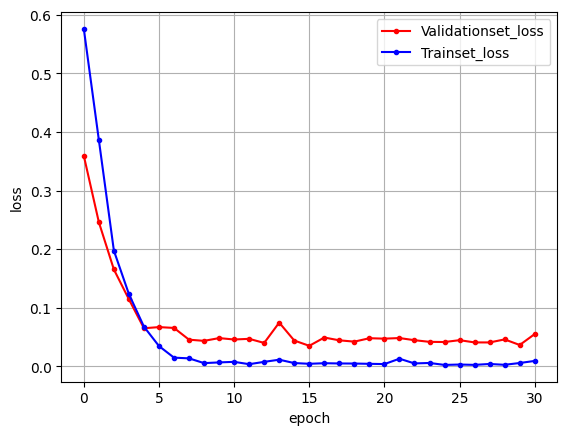

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 새 섹션

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from keras.models import load_model

new_model = load_model('/content/drive/MyDrive/test/model' + 'voca_size_' + str(voca_size) + 'input_lenght_' + str(max_len) + '/' + 'model.h5', custom_objects={'Attention': Attention}) #최상의 모델 저장한 것을 불러오기
y_pred = new_model.predict(X_test)
y_true = y_test
y_pred = (y_pred > 0.5)

acc = accuracy_score(y_true=y_true, y_pred=y_pred)  #sklearn에서의 accuracy_score,precision_score, recall_score, f1_score를 이용하여 정확도, 정밀도, 재현율, f1 스코어를 보여줌
pre = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
rec = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

print("정확도: %f, 정밀도: %f, 재현율: %f, f1스코어: %f" %(acc, pre, rec, f1))

5/5 [==============================] - 2s 192ms/step
정확도: 0.977444, 정밀도: 0.945742, 재현율: 0.957063, f1스코어: 0.948170
